In [16]:
import keras

from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

In [17]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = "C:/Users/yang/Desktop/nongzuowu/small/"

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i+=1
        if i * batch_size>=sample_count:
            break
    return features, labels

In [18]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [20]:
test_dir 

'C:/Users/yang/Desktop/nongzuowu/small/test'

In [23]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [25]:
conv_base.trainable=True


set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
        
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(
               rescale=1./255,
               rotation_range=40,
               width_shift_range=0.2,
               height_shift_range=0.2,
               shear_range=0.2,
               horizontal_flip=0.2,
               fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150,150),
            batch_size=20,
            class_mode='binary')

validation_genetator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150,150),
            batch_size = 20,
            class_mode = 'binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(train_generator, 
                              steps_per_epoch=100, 
                              epochs=100,
                              validation_data=validation_genetator,
                              validation_steps=50,
                              )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 51s 513ms/step - loss: 0.5573 - acc: 0.7155 - val_loss: 0.4540 - val_acc: 0.7920
Epoch 2/100
100/100 [==============================] - 51s 512ms/step - loss: 0.4002 - acc: 0.8260 - val_loss: 0.3988 - val_acc: 0.8250
Epoch 3/100
100/100 [==============================] - 51s 514ms/step - loss: 0.3516 - acc: 0.8485 - val_loss: 0.3453 - val_acc: 0.8540
Epoch 4/100
100/100 [==============================] - 51s 513ms/step - loss: 0.3193 - acc: 0.8580 - val_loss: 0.3333 - val_acc: 0.8630
Epoch 5/100
100/100 [==============================] - 52s 515ms/step - loss: 0.2915 - acc: 0.8710 - val_loss: 0.3106 - val_acc: 0.8750
Epoch 6/100
100/100 [==============================] - 52s 516ms/step - loss: 0.2736 - acc: 0.8845 - val_loss: 0.3131 - val_acc: 0.8660
Epoch 7/100
100/100 [==============================] - 52s 517ms/step - loss: 0.2575 - acc: 0.8980 -

In [26]:
model.save("hulianwang+.h5")

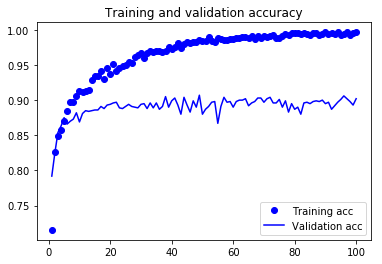

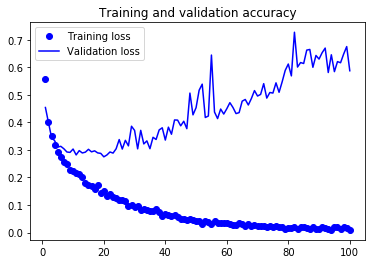

In [28]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend()


In [30]:
test_generator=test_datagen.flow_from_directory(
                test_dir,
                target_size=(150, 150),
                batch_size=20,
                class_mode='binary')


test_loss, test_acc=model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.


In [31]:
test_acc

0.8970000147819519